In [ ]:
# get libraries
import numpy as np

# Hoeffding Inequality
Problems 1 and 2

In [28]:


def hoeffding():
    num_coins = 1000
    num_flips = 10
    repetitions = 100000
    v1sum=vrandsum=vminsum=0.0


    for i in range(repetitions):
        # create coins
        coins = np.random.randint(0, 2, [num_coins, num_flips])

        # first coin heads fraction
        v1sum += coins[0].mean()
        # random coin fractions heads
        vrandsum += coins[np.random.choice(coins.shape[0], 1, replace=False)].mean()
        # coin with lowest frequency of heads, heads fraction
        vminsum += np.min(np.sum(coins, axis=1))/num_flips
        
        if i % 10000 == 0: # placate human psychology
            print("working")


    print("avg V1: " + str(v1sum/repetitions))
    print("avg Vrand: " +  str(vrandsum/repetitions))
    print("avg Vmin: " + str(vminsum/repetitions))
    
# hoeffding()

working
working
working
working
working
working
working
working
working
working
hello
avg V1: 0.5004700000000026
avg Vrand: 0.4994049999999957
avg Vmin: 0.03754399999997681


# Linear Regression
Problems 5-7

avg E_in: 0.026
avg Eout for N = 10: 0.10721900000000001
Average number of iterations for N = 10: 4.545


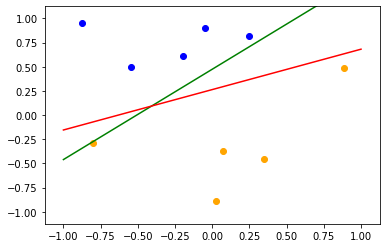

In [63]:
# much of this code is reused from Homework 1

number_of_points = 10
number_of_runs = 1000
Ein = np.empty(number_of_runs)
Eout = np.empty(number_of_runs)
iters = np.empty(number_of_runs)



for i in range(number_of_runs):
    # create target function
    target = np.random.uniform(-1,1,[2,2]) # create two random points to define line
    
    
    
    
    # generate inputs
    inputs = np.random.uniform(-1,1,[number_of_points,2])

    # generate classification
    def side(points, line):
        """Returns the side of the line the points are on."""
        return np.sign((points[:,0] - line[0,0]) * (line[1,1] - line [0,1]) - (points[:,1] - line[0,1]) * (line[1,0] - line[0,0])).astype('int_')

    classification = side(inputs, target)
    side1 = inputs[classification>0]
    side2 = inputs[classification<=0]
    
    augmented = np.concatenate([np.ones([number_of_points,1]), inputs], axis=1) # add 1 as X_0
    
    w = np.linalg.pinv(augmented) @ classification
    
    # calculate Ein
    hypothesis = np.sign(np.dot(w, np.transpose(augmented))).astype('int_')
    incorrect = (hypothesis != classification)
    Ein[i] = incorrect.mean()
    
     # compute P[f(x) != g(x)] (we will estimate for now)
    test_data = np.random.uniform(-1,1,[1000, 2]) # generate sample data
    
    # calculate correct classification
    # we have to do this now because side doesn't deal with the added 1's
    proper = side(test_data, target)
    
    test_data = np.concatenate([np.ones([1000,1]), test_data], axis=1) # add 1's
    hypoth = np.sign(np.dot(w, np.transpose(test_data))).astype('int_') # calculate h(x)
    
    incorrect = hypoth != proper
    if i==1:        
        #print(incorrect)
        %matplotlib inline
        import matplotlib.pyplot as plt
        divider = np.linspace(-1,1,1000)
        plt.ylim(-1.125,1.125)
        plt.xlim(-1.125,1.125)
        plt.plot(divider, ((target[0,1]-target[1,1]) / (target[0,0]-target[1,0]))*(divider - target[0, 0]) + target[0,1], c='green')
        plt.plot(divider, (-w[0] - w[1]*divider)/w[2] , c='red')

        plt.scatter(side1[:,0], side1[:, 1], c= 'orange')
        plt.scatter(side2[:,0], side2[:, 1], c= 'blue')
    
    
    Eout[i] = incorrect.mean()
    
    
    # Do PlA
    correct = np.full([1,number_of_points],False)
    iterations = 0 # track iteratison
    while True:
    
        hypothesis = np.sign(np.dot(w, np.transpose(augmented))).astype('int_')
        correct = (hypothesis == classification)
    
        # check if done
        if correct.all():
            break
    
        misclass = augmented[~correct][0] #TODO: Make actually random
    
        #update w
        w = w + classification[~correct][0] * misclass
        iterations += 1
    
    # add number of iterations to the list
    iters[i] = iterations

    
    
    
    
    

    
    
print("avg E_in: " + str(Ein.mean()))
print("avg Eout for N = " + str(number_of_points) + ": " + str(Eout.mean()))

print("Average number of iterations for N = " + str(number_of_points) + ": " + str(iters.mean()))


# Nonlinear Transformation
Problems 8-10

In [136]:
number_of_points = 1000





def std_feature(input):
    return np.concatenate([np.ones([input.shape[0],1]), input], axis=1) # add 1's


def lin_regr(feature, classif):
    return np.linalg.pinv(feature) @ classif

def experiment(feat_fun):
    #generate points
    training_set = np.random.uniform(-1,1,[number_of_points,2])
    
    # generate classification with noise
    # target (given by problem) : sign(x1^2+x2^2-0.6)
    # noise: p(y|x)= .1 y!=f(x); .9 y != f(x)
    classification = (np.sign(training_set[:,0]**2 + training_set[:,1]**2 - 0.6)
                      * np.random.choice([-1,1], p=[0.1, 0.9]))

    features = feat_fun(training_set)
    
    solution = lin_regr(features, classification)
    
    # find Ein
    # calculate Ein
    hypothesis = np.sign(np.dot(solution, np.transpose(features))).astype('int_')
    incorrect = (hypothesis != classification)
    Ein = incorrect.mean()
    
    return (solution, Ein)
    

def non_lin_feat(input):
    return np.concatenate([np.ones([input.shape[0],1]), input,
                            np.array([input[:,0] * input[:,1]]).T,
                            np.array([input[:,0]**2]).T, np.array([input[:,1]**2]).T ],  axis=1)
    
    
# run experiment for p8
num_of_runs = 1000
Ein = np.empty(num_of_runs)

for i in range(num_of_runs):
    _ , Ein[i] = experiment(std_feature)

print("avg E_in: " + str(Ein.mean()))

# run for p9
num_of_runs = 1000
w = np.zeros(6)
for i in range(num_of_runs):
    t,_ = experiment(non_lin_feat)
    w = w + t

print(w/num_of_runs)

# irresponsibly skipping question 10 (don't want to have to fix all my functions)

avg E_in: 0.5084150000000001
[-9.72122870e-01  9.94645891e-04  2.03134606e-04 -2.22630918e-03
  1.52459867e+00  1.52836402e+00]
